<a href="https://colab.research.google.com/github/NguyenDa18/MachineLearning_HW6/blob/master/Spam%20Naive%20Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Spam Classifier
- Column 1 = feature vector instance number
- Column 2 = {-1,1} whether message is spam (1) or not (-1)
- Column 3 = feature vector, 344 chars long where each char is a unique word or an email feature that would identify email as spam/non-spam. Boolean of whether or not feature occurred in email (1 = yes, 0 = no)

- [Source](https://www.youtube.com/watch?v=8aZNAmWKGfs)

# 1) Process txt data and split into test and train sets

In [0]:

import pandas as pd
import numpy as np

data_o = pd.read_csv('./SpamInstances.txt', header=None)

# Divide each row into arrs
data_o = data_o[0].str.split(" ")[1:]
for row in range(len(data_o)):
    data_o.iloc[row] = [int(el) for el in data_o.iloc[row]]
    
for row in data_o:
  row[2] = str(row[2])

In [0]:
# Create our Spam / Non-Spam data structs

def process_data(data):
    total_SPAM = 0
    total_HAM = 0
    
    num_spam = [1] * (344 + 1)
    num_ham = [1] * (344 + 1)
  
    for row in data:
        spam = row[1] == 1
        if (spam == 1):
            total_SPAM += 1
        else:
            total_HAM += 1
            
        for i, c in enumerate(row[2]):
            if (c == '1'):
                if (spam):
                    num_spam[i] += 1
                else:
                    num_ham[i] += 1
                    
            i += 1
    return total_SPAM, total_HAM, num_spam, num_ham

In [0]:
def get_testing_set(data):
    validation_set = [d for d in data if not d in training_set]
    return validation_set

Partitioned Set (1) | Training set size: 100:
Accuracy: 8005 out of 15397; 0.5199064752873936
False positives 7386
False negatives 6
Partitioned Set (2) | Training set size: 747:
Accuracy: 7663 out of 14750; 0.5195254237288136
False positives 7081
False negatives 6
Partitioned Set (3) | Training set size: 1394:
Accuracy: 7266 out of 14103; 0.515209529887258
False positives 6831
False negatives 6
Partitioned Set (4) | Training set size: 2041:
Accuracy: 6968 out of 13456; 0.5178359096313913
False positives 6483
False negatives 5
Partitioned Set (5) | Training set size: 2688:
Accuracy: 6670 out of 12809; 0.5207276133968304
False positives 6133
False negatives 6
Partitioned Set (6) | Training set size: 3336:
Accuracy: 6303 out of 12161; 0.518296192747307
False positives 5853
False negatives 5
Partitioned Set (7) | Training set size: 3983:
Accuracy: 6056 out of 11514; 0.5259683863123155
False positives 5453
False negatives 5
Partitioned Set (8) | Training set size: 4630:
Accuracy: 5616 out 

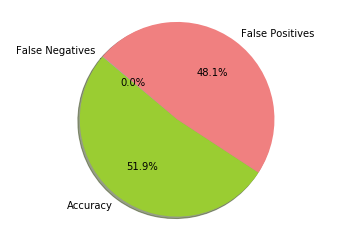

In [0]:
t = 0
total_accuracy = 0
total_penalty = 0
total_false_positives = 0
total_false_negatives = 0
for e in numpy.linspace(100, 0.8 * len(data_o), 20):
    e = int(e)
    data = data_o
    t += 1
    print("Partitioned Set (" + str(t) + ") | Training set size: " + str(e) + ":")

    # preprocessing
    training_set = random.sample(list(data), e)
    validation_set = get_testing_set(data)
    data = training_set
    den_spam, den_ham, num_spam, num_ham = process_data(data)

    accuracy = 0
    false_positives = 0
    false_negatives = 0
    count = 0
    data = validation_set
    for d in data:
        count += 1
        spam = 1.0
        ham = 1.0
        for i, c in enumerate(d[2]):
            fraction_spam = float(num_spam[i]) / float(den_spam)
            fraction_ham = float(num_ham[i]) / float(den_ham)
            if (c == "1"):
                spam *= fraction_spam
                ham *= fraction_ham
        is_spam = (spam > ham) * 2 - 1
        if (is_spam == d[1]):
            accuracy += 1
            total_accuracy += 1
        elif (is_spam == 1 and d[1] == -1):
            false_positives += 1
            total_false_positives += 1
            total_penalty += 1
        elif (is_spam == -1 and d[1] == 1):
            false_negatives += 1
            total_false_negatives += 1
            total_penalty += 1

    print("Accuracy: " + str(accuracy) + " out of " + str(count) + "; " + str(float(accuracy) / count))
    print("False positives " + str(false_positives))
    print("False negatives " + str(false_negatives))
    
print("Total accuracy: " + str(total_accuracy) + ", penalty: " + str(total_penalty))
print("Total stats: \n Total false positives: " + str(total_false_positives) + "; Total false negatives: " + str(total_false_negatives)) 


#### PIE CHART ####
labels = 'Accuracy', 'False Positives', 'False Negatives'
sizes = [total_accuracy, total_false_positives, total_false_negatives]
colors = ['yellowgreen', 'lightcoral', 'lightskyblue']
# Plot
plt.pie(sizes, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()


In [27]:
def precision(tp, fp):
  print((tp) / (tp + fp))

precision(8005, 7386)
precision(7663, 7081)
precision(7266, 6831)
precision(6968, 6483)
precision(6670, 6133)
precision(6303, 5853)
precision(6056, 5453)
precision(5616, 5247)
precision(5314, 4901)
precision(4934, 4637)
precision(4574, 4346)
precision(4262, 4013)
precision(7866, 3669)
precision(3597, 3386)
precision(3282, 3051)
precision(2936, 2751)
precision(2637, 2402)
precision(2318, 2075)
precision(1970, 1776)
precision(1635, 1464)

0.5201091547007992
0.5197368421052632
0.5154288146414131
0.5180283993755112
0.5209716472701711
0.5185093780848964
0.5261968893909115
0.5169842584921293
0.5202153695545766
0.5155156201023926
0.512780269058296
0.5150453172205438
0.681924577373212
0.5151081197193184
0.5182378019895784
0.5162651661684544
0.5233181186743402
0.5276576371500113
0.5258942872397224
0.5275895450145208


In [28]:
def recall(tp, fn):
  print((tp) / (tp + fn))

recall(8005, 6)
recall(7663, 6)
recall(7266, 6)
recall(6968, 5)
recall(6670, 6)
recall(6303, 5)
recall(6056, 5)
recall(5616, 4)
recall(5314, 5)
recall(4934, 1)
recall(4574, 5)
recall(4262, 3)
recall(7866, 4)
recall(3597, 0)
recall(3282, 3)
recall(2936, 2)
recall(2637, 3)
recall(2318, 1)
recall(1970, 1)
recall(1635, 1)

0.9992510298339783
0.9992176294171339
0.9991749174917491
0.9992829485157034
0.9991012582384662
0.9992073557387444
0.9991750536215146
0.999288256227758
0.999059973679263
0.9997973657548126
0.9989080585280629
0.9992966002344665
0.9994917407878018
1.0
0.9990867579908675
0.9993192648059904
0.9988636363636364
0.9995687796463993
0.9994926433282597
0.9993887530562348
